___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Are you more likely to get arrested at a certain time of day? Are drug-related stops on the rise? In this chapter, you will answer these and other questions by analyzing the dataset visually, since plots can help you to understand trends in a way that examining the raw data cannot.

## Calculating the hourly arrest rate

When a police officer stops a driver, a small percentage of those stops ends in an arrest. This is known as the **arrest rate**. In this exercise, you'll find out whether the arrest rate varies by time of day.

First, you'll calculate the arrest rate across all stops. Then, you'll calculate the **hourly arrest rate** by using the ``hour`` attribute of the ``index``. The hour ranges from ``0`` to ``23``, in which:

``0 = midnight``<br>
``12 = noon`` <br>
``23 = 11 PM``

> Before starting your work in this section **repeat the steps which you did in the first chapter for preparing the data.** Continue to this chapter based on where you were in the end of the first chapter.

In [1]:
import pandas as pd

In [2]:
ri = pd.DataFrame(pd.read_csv("RI_cleaned.csv", nrows = 50000))

C:\Users\walke\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
ri.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,0,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [4]:
ri.isnull().head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,True,True,True,False,True,...,False,True,True,False,True,True,True,True,False,False
3,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,True,False,False,...,False,True,True,False,False,False,False,False,False,False


In [5]:
ri.isnull().sum()

id                           0
state                        0
stop_date                    0
stop_time                    0
location_raw                 0
county_name              50000
county_fips              50000
fine_grained_location    50000
police_department            0
driver_gender             1990
driver_age_raw            1971
driver_age                2208
driver_race_raw           1988
driver_race               1988
violation_raw             1988
violation                 1988
search_conducted             0
search_type_raw          47988
search_type              47988
contraband_found             0
stop_outcome              1988
is_arrested               1988
stop_duration             1988
out_of_state              2203
drugs_related_stop           0
district                     0
dtype: int64

In [6]:
ri.shape

(50000, 26)

In [7]:
ri.drop(["state", "county_name", "county_fips", "fine_grained_location"], axis = 1, inplace = True)

In [8]:
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,2005-01-04,11:30,Zone X1,0,NaN,NaN,NaN,NaN,NaN,...,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [9]:
ri.shape

(50000, 22)

In [10]:
ri.isnull().sum()

id                        0
stop_date                 0
stop_time                 0
location_raw              0
police_department         0
driver_gender          1990
driver_age_raw         1971
driver_age             2208
driver_race_raw        1988
driver_race            1988
violation_raw          1988
violation              1988
search_conducted          0
search_type_raw       47988
search_type           47988
contraband_found          0
stop_outcome           1988
is_arrested            1988
stop_duration          1988
out_of_state           2203
drugs_related_stop        0
district                  0
dtype: int64

In [11]:
ri.dropna(subset = ["driver_gender"], inplace = True)

In [12]:
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
3,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
5,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [13]:
ri.isnull().sum()

id                        0
stop_date                 0
stop_time                 0
location_raw              0
police_department         0
driver_gender             0
driver_age_raw            0
driver_age              232
driver_race_raw           0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type_raw       45998
search_type           45998
contraband_found          0
stop_outcome              0
is_arrested               0
stop_duration             0
out_of_state            215
drugs_related_stop        0
district                  0
dtype: int64

In [14]:
ri.shape

(48010, 22)

In [15]:
ri["is_arrested"].head()

0    False
1    False
3    False
4    False
5    False
Name: is_arrested, dtype: object

In [16]:
ri["is_arrested"].dtype

dtype('O')

In [17]:
ri["is_arrested"] = ri["is_arrested"].astype("bool")

In [18]:
ri["is_arrested"].dtype

dtype('bool')

In [19]:
x = ri["stop_date"] + " " + ri["stop_time"]

In [20]:
ri["stop_datetime"] = pd.to_datetime(x)

In [21]:
ri.dtypes

id                            object
stop_date                     object
stop_time                     object
location_raw                  object
police_department             object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race_raw               object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type_raw               object
search_type                   object
contraband_found                bool
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
out_of_state                  object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

In [22]:
ri.set_index("stop_datetime", inplace = True)

In [23]:
ri.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,White,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,500,M,1986.0,19.0,W,White,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,500,M,1978.0,27.0,B,Black,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,0,M,1973.0,32.0,B,Black,...,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [24]:
"stop_datetime" in ri

False

**INSTRUCTIONS**

*   Take the mean of the ``is_arrested`` column to calculate the overall arrest rate.
*   Group by the ``hour`` attribute of the ``DataFrame`` index to calculate the hourly arrest rate.
*   Save the **hourly arrest rate** ``Series`` as a new object, ``hourly_arrest_rate``.

In [25]:
ri["is_arrested"].mean()

0.05182253697146428

In [26]:
ri.groupby(ri.index.hour)["is_arrested"].mean()

stop_datetime
0     0.091657
1     0.113384
2     0.113103
3     0.084877
4     0.065217
5     0.037975
6     0.020573
7     0.022004
8     0.023802
9     0.031267
10    0.033094
11    0.026150
12    0.046575
13    0.035284
14    0.034194
15    0.046850
16    0.044487
17    0.054431
18    0.049796
19    0.059952
20    0.060850
21    0.115991
22    0.073970
23    0.066730
Name: is_arrested, dtype: float64

In [27]:
hourly_arrest_rate = ri.groupby(ri.index.hour)["is_arrested"].mean()

***

## Plotting the hourly arrest rate

You'll create a line plot from the ``hourly_arrest_rate`` object. A line plot is appropriate in this case because you're showing how a quantity changes over time.

This plot should help you to spot some trends that may not have been obvious when examining the raw numbers!

**INSTRUCTIONS**

*   Import ``matplotlib.pyplot`` using the alias ``plt``.
*   Create a **line plot** of ``hourly_arrest_rate`` using the ``.plot()`` method.
*   Label the ``x-axis`` as ``'Hour'``, label the ``y-axis`` as ``'Arrest Rate'``, and title the plot ``'Arrest Rate by Time of Day'``.
*   Display the plot using the ``.show()`` function.

In [28]:
import matplotlib.pyplot as plt

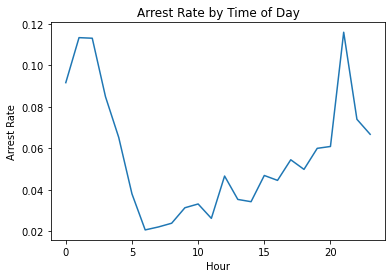

In [29]:
plt.plot(hourly_arrest_rate)
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")
plt.show()

***

## Plotting drug-related stops

In a small portion of traffic stops, drugs are found in the vehicle during a search. You'll assess whether these **drug-related stops** are becoming more common over time.

The Boolean column ``drugs_related_stop`` indicates whether drugs were found during a given stop. You'll calculate the **annual drug rate** by **resampling** this column, and then you'll use a line plot to visualize how the rate has changed over time.

**INSTRUCTIONS**

*   Calculate the **annual rate** of drug-related stops by **resampling** the ``drugs_related_stop`` column (on the ``'A'`` frequency) and taking the mean.
*   Save the annual drug rate ``Series`` as a new object, ``annual_drug_rate``.
*   Create a line plot of ``annual_drug_rate`` using the ``.plot()`` method.
*   Display the plot using the ``.show()`` function.

In [30]:
ri["drugs_related_stop"].resample("A").mean()

stop_datetime
2005-12-31    0.008038
2006-12-31    0.006257
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [31]:
annual_drug_rate = ri["drugs_related_stop"].resample("A").mean()

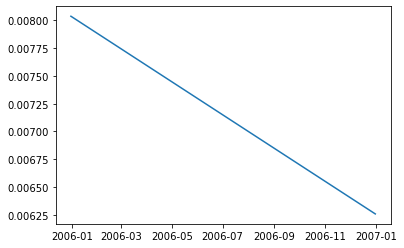

In [32]:
plt.plot(annual_drug_rate)
plt.show()

***

## Comparing drug and search rates (to be deleted)

As you saw in the last exercise, the rate of **drug-related stops** increased significantly between ``2005`` and ``2015``. You might hypothesize that the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.

You can test this hypothesis by calculating the annual search rate, and then plotting it against the annual drug rate. If the hypothesis is true, then you'll see both rates increasing over time.

**INSTRUCTIONS**

*   Calculate the annual search rate by **resampling** the ``search_conducted`` column, and save the result as ``annual_search_rate``.
*   Concatenate ``annual_drug_rate`` and ``annual_search_rate`` along the ``columns axis``, and save the result as ``annual``.
*   Create subplots of the drug and search rates from the ``annual`` ``DataFrame``.
*   Display the subplots.

In [33]:
ri.dtypes

id                     object
stop_date              object
stop_time              object
location_raw           object
police_department      object
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race_raw        object
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type_raw        object
search_type            object
contraband_found         bool
stop_outcome           object
is_arrested              bool
stop_duration          object
out_of_state           object
drugs_related_stop       bool
district               object
dtype: object

In [34]:
ri["search_conducted"].head()

stop_datetime
2005-01-02 01:55:00    False
2005-01-02 20:30:00    False
2005-01-04 12:55:00    False
2005-01-06 01:30:00    False
2005-01-12 08:05:00    False
Name: search_conducted, dtype: bool

In [35]:
ri["search_conducted"] = ri["search_conducted"].astype("bool")

In [36]:
ri["search_conducted"].dtype

dtype('bool')

In [58]:
annual_search_rate = ri["search_conducted"].resample("A").mean()

In [59]:
annual_search_rate

stop_datetime
2005-12-31    0.050692
2006-12-31    0.038361
Freq: A-DEC, Name: search_conducted, dtype: float64

In [60]:
annual = pd.concat([annual_drug_rate, annual_search_rate], axis = 1)

In [61]:
annual

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.008038,0.050692
2006-12-31,0.006257,0.038361


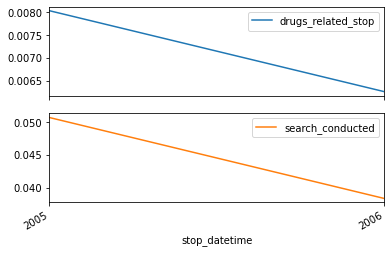

In [62]:
annual.plot(subplots = True)
plt.show()

***

## Tallying violations by district

The state of **Rhode Island** is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police?

In this exercise, you'll create a frequency table to determine how many violations of each type took place in each of the six zones. Then, you'll filter the table to focus on the ``"K"`` zones, which you'll examine further in the next exercise.

**INSTRUCTIONS**

*   Create a ``frequency table`` from the ``district`` and ``violation`` columns using the ``pd.crosstab()`` function.
*   Save the ``frequency table`` as a new object, ``all_zones``.
*   Select rows ``'Zone K1'`` through ``'Zone K3'`` from ``all_zones`` using the ``.loc[]`` accessor.
*   Save the smaller table as a new object, ``k_zones``.

In [65]:
pd.crosstab(ri["district"], ri["violation"])

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
district,,,,,
Zone K1,276,517,69,52,5895
Zone K2,422,1220,156,256,7653
Zone K3,1083,1181,247,435,10608
Zone X1,93,643,44,9,1128
Zone X3,342,741,127,102,4148
Zone X4,806,2220,249,609,6679


In [43]:
all_zones = pd.crosstab(ri["district"], ri["violation"])

In [44]:
all_zones.loc["Zone K1" : "Zone K3"]

violation,Equipment,Moving violation,Other,Registration/plates,Speeding
district,,,,,
Zone K1,276,517,69,52,5895
Zone K2,422,1220,156,256,7653
Zone K3,1083,1181,247,435,10608


In [45]:
k_zones = all_zones.loc["Zone K1" : "Zone K3"]

***

## Plotting violations by district

Now that you've created a frequency table focused on the ``"K"`` zones, you'll visualize the data to help you compare what violations are being caught in each zone.

First you'll create a **bar plot**, which is an appropriate plot type since you're comparing categorical data. Then you'll create a **stacked bar plot** in order to get a slightly different look at the data. Which plot do you find to be more insightful?

**INSTRUCTIONS 1/2**

*   Create a bar plot of ``k_zones``.
*   Display the plot and examine it. What do you notice about each of the zones?

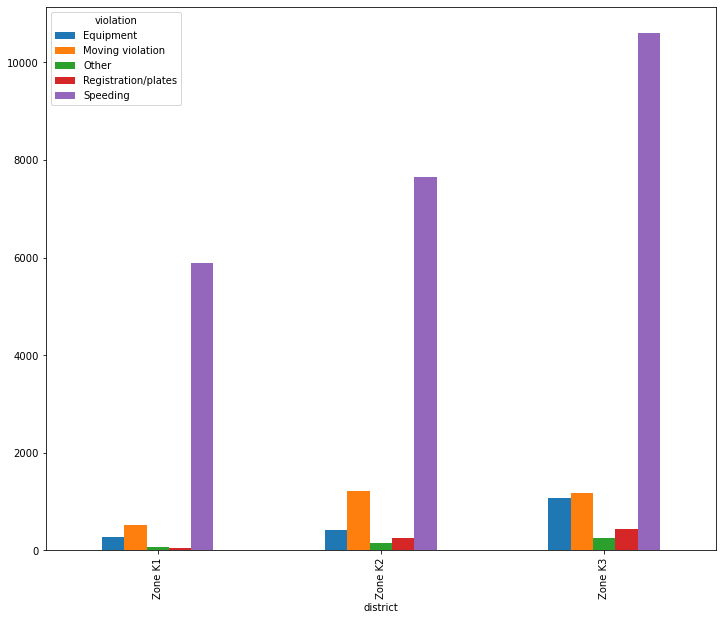

In [46]:
k_zones.plot(kind = "bar", figsize = (12,10));

**INSTRUCTIONS 2/2**

*   Create a stacked bar plot of ``k_zones``.
*   Display the plot and examine it. Do you notice anything different about the data than you did previously?

<AxesSubplot:xlabel='district'>

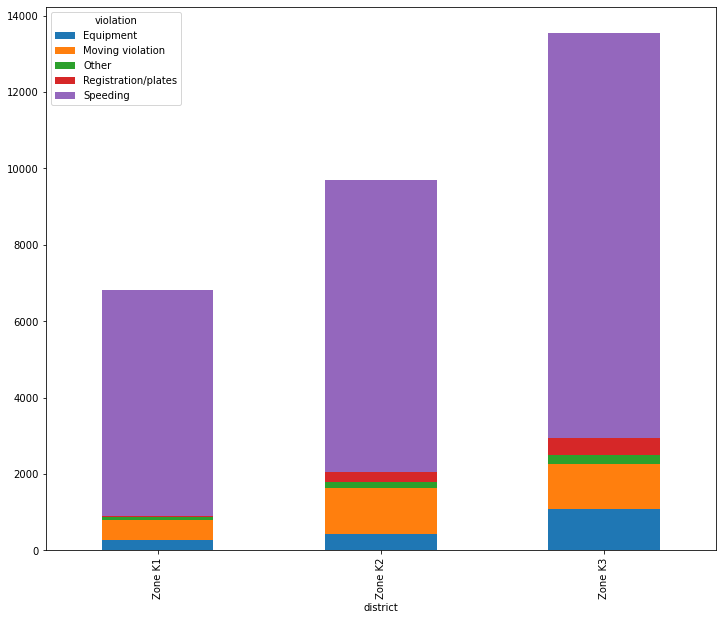

In [47]:
k_zones.plot(kind = "bar", stacked = True, figsize = (12,10))

***

## Converting stop durations to numbers

In the traffic stops dataset, the ``stop_duration`` column tells you approximately how long the driver was detained by the officer. Unfortunately, the durations are stored as ``strings``, such as ``'0-15 Min'``. How can you make this data easier to analyze?

In this exercise, you'll convert the **stop durations** to ``integers``. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:

*   Convert ``'0-15 Min'`` to ``8``
*   Convert ``'16-30 Min'`` to ``23``
*   Convert ``'30+ Min'`` to ``45``

**INSTRUCTIONS**

*   Print the **unique values** in the ``stop_duration`` column. (This has been done for you.)
*   Create a ``dictionary`` called ``mapping`` that maps the ``stop_duration`` strings to the integers specified above.
*   Convert the ``stop_duration`` strings to integers using the ``mapping``, and store the results in a new column called ``stop_minutes``.
*   Print the unique values in the ``stop_minutes`` column, to verify that the durations were properly converted to integers.

In [48]:
print(ri["stop_duration"].unique())

['0-15 Min' '16-30 Min' '30+ Min']


In [49]:
mapping = {"0-15 Min": 8, "16-30 Min": 23, "30+ Min" : 45}

In [50]:
ri["stop_minutes"] = ri["stop_duration"].map(mapping)

In [51]:
print(ri["stop_minutes"].unique())

[ 8 23 45]


***

## Plotting stop length

**INSTRUCTIONS**

*   For each value in the ``violation_raw`` column, calculate the **mean number** of ``stop_minutes`` that a driver is detained.
*   Save the resulting ``Series`` as a new object, ``stop_length``.
*   Sort ``stop_length`` by its values, and then visualize it using a **horizontal bar plot**.
*   Display the plot.

In [52]:
ri["violation_raw"].unique()

array(['Speeding', 'Equipment/Inspection Violation', 'Call for Service',
       'Other Traffic Violation', 'Registration Violation',
       'Violation of City/Town Ordinance',
       'Special Detail/Directed Patrol', 'APB',
       'Motorist Assist/Courtesy', 'Suspicious Person', 'Warrant'],
      dtype=object)

In [53]:
ri.groupby("violation_raw")["stop_minutes"].mean()

violation_raw
APB                                 28.078431
Call for Service                    27.637895
Equipment/Inspection Violation      13.668101
Motorist Assist/Courtesy            15.528409
Other Traffic Violation             14.207298
Registration Violation              17.304170
Special Detail/Directed Patrol      30.902778
Speeding                             9.707181
Suspicious Person                   21.821429
Violation of City/Town Ordinance    11.153846
Warrant                             29.666667
Name: stop_minutes, dtype: float64

In [54]:
stop_length = ri.groupby("violation_raw")["stop_minutes"].mean()

In [67]:
stop_length.sort_values()

violation_raw
Speeding                             9.707181
Violation of City/Town Ordinance    11.153846
Equipment/Inspection Violation      13.668101
Other Traffic Violation             14.207298
Motorist Assist/Courtesy            15.528409
Registration Violation              17.304170
Suspicious Person                   21.821429
Call for Service                    27.637895
APB                                 28.078431
Warrant                             29.666667
Special Detail/Directed Patrol      30.902778
Name: stop_minutes, dtype: float64

<AxesSubplot:ylabel='violation_raw'>

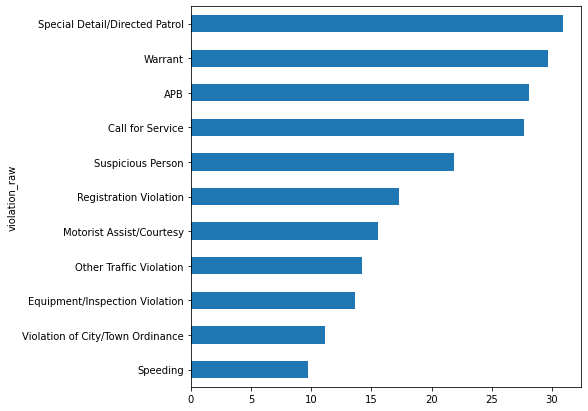

In [55]:
stop_length.sort_values().plot(kind = "barh", figsize = (7,7))